### Derivation of Quadratic Peak Interpolation Formula (Log-Magnitude)

We want to refine the frequency estimate from the FFT using **3 points** from the magnitude (or log-magnitude) spectrum:

Let:

$$
\alpha = \log(m_{i-1}), \quad \beta = \log(m_i), \quad \gamma = \log(m_{i+1})
$$

These are the log-magnitudes at the peak bin and its two neighbors.

---

#### Step 1: Fit a parabola through the 3 points

Assume the parabola is:

$$
y(x) = ax^2 + bx + c
$$

Let the 3 points be:

$$
(-1, \alpha), \quad (0, \beta), \quad (1, \gamma)
$$

---

#### Step 2: Solve for coefficients using the 3 points

Plug the points into the equation:

1. \( \alpha = a(-1)^2 + b(-1) + c = a - b + c \)
2. \( \beta = a(0)^2 + b(0) + c = c \)
3. \( \gamma = a(1)^2 + b(1) + c = a + b + c \)

From (2), we know:

$$
c = \beta
$$

Substitute into (1) and (3):

$$
\alpha = a - b + \beta \quad \Rightarrow \quad a - b = \alpha - \beta \\
\gamma = a + b + \beta \quad \Rightarrow \quad a + b = \gamma - \beta
$$

Now solve:

- Add: \( 2a = \alpha + \gamma - 2\beta \Rightarrow a = \frac{\alpha + \gamma - 2\beta}{2} \)
- Subtract: \( 2b = \gamma - \alpha \Rightarrow b = \frac{\gamma - \alpha}{2} \)

---

#### Step 3: Vertex of a parabola

The vertex of a parabola \( y = ax^2 + bx + c \) is located at:

$$
x_{\text{vertex}} = -\frac{b}{2a}
$$

Substitute \( a \) and \( b \):

$$
x_{\text{vertex}} = -\frac{\frac{\gamma - \alpha}{2}}{2 \cdot \frac{\alpha + \gamma - 2\beta}{2}} = \frac{1}{2} \cdot \frac{\alpha - \gamma}{\alpha - 2\beta + \gamma}
$$

---

### Final Shortcut Formula

$$
p = \frac{1}{2} \cdot \frac{\alpha - \gamma}{\alpha - 2\beta + \gamma}
$$

This gives the **sub-bin offset** \( p \) from the center bin \( i \). Add this to the bin index to get the **refined frequency estimate**.



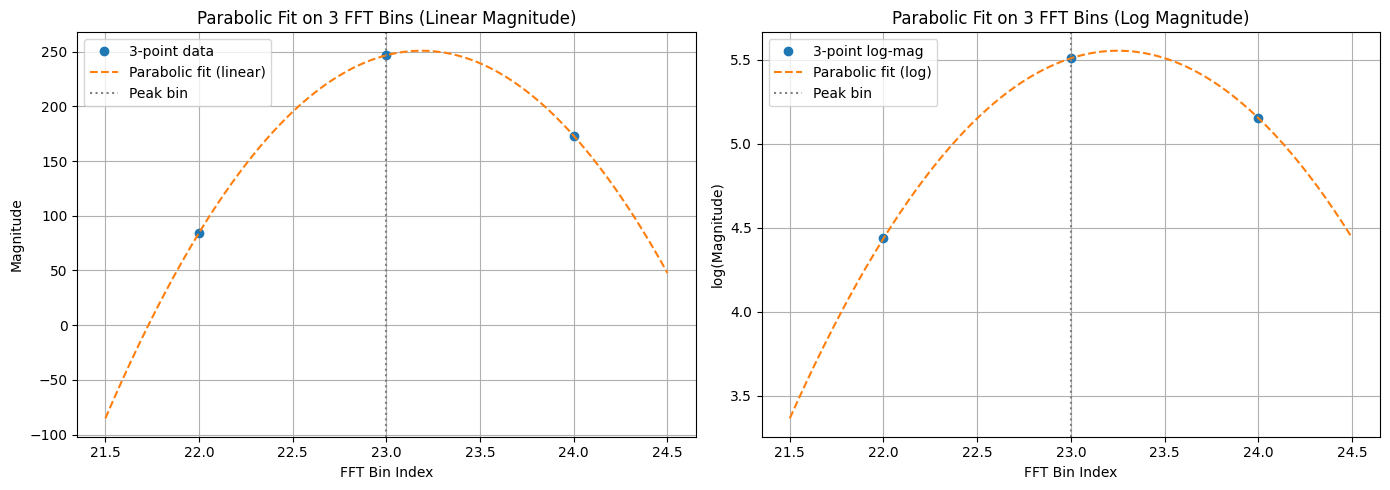

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Signal setup ---
fs = 44100
f_tone = 1000.7
N = 1024
t = np.linspace(0, N/fs, N, endpoint=False)
signal = np.sin(2 * np.pi * f_tone * t)
windowed = signal * np.hanning(N)

# --- FFT ---
fft = np.fft.rfft(windowed)
mag = np.abs(fft)
log_mag = np.log(mag + 1e-12)
freqs = np.fft.rfftfreq(N, 1/fs)

# --- Get 3-point neighborhood around peak ---
peak_idx = np.argmax(mag)
i0 = peak_idx - 1
i1 = peak_idx
i2 = peak_idx + 1
x = np.array([i0, i1, i2], dtype=float)

# --- Linear magnitude parabola fit ---
y_linear = mag[[i0, i1, i2]]
coeffs_linear = np.polyfit(x, y_linear, 2)
x_dense = np.linspace(i0 - 0.5, i2 + 0.5, 200)
y_fit_linear = np.polyval(coeffs_linear, x_dense)

# --- Log-magnitude parabola fit ---
y_log = log_mag[[i0, i1, i2]]
coeffs_log = np.polyfit(x, y_log, 2)
y_fit_log = np.polyval(coeffs_log, x_dense)

# --- Plot both side-by-side ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y_linear, 'o', label='3-point data')
plt.plot(x_dense, y_fit_linear, '--', label='Parabolic fit (linear)')
plt.axvline(peak_idx, color='gray', linestyle=':', label='Peak bin')
plt.title("Parabolic Fit on 3 FFT Bins (Linear Magnitude)")
plt.xlabel("FFT Bin Index")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, y_log, 'o', label='3-point log-mag')
plt.plot(x_dense, y_fit_log, '--', label='Parabolic fit (log)')
plt.axvline(peak_idx, color='gray', linestyle=':', label='Peak bin')
plt.title("Parabolic Fit on 3 FFT Bins (Log Magnitude)")
plt.xlabel("FFT Bin Index")
plt.ylabel("log(Magnitude)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
